In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline


#Imported The Necessary Libraries.

In [3]:
#First Thing First checking data info:

df=pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


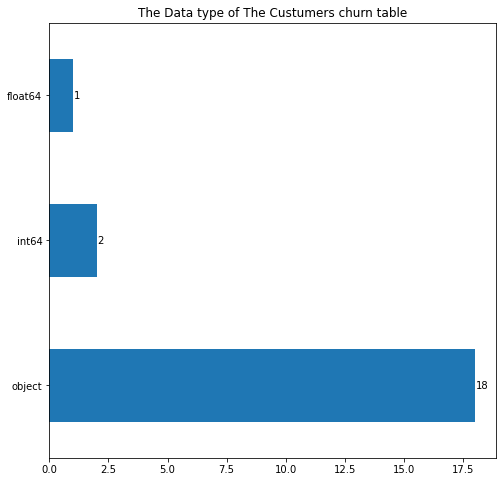

In [6]:
#Plotting The Data type columns

ax=df.dtypes.value_counts().plot(kind='barh',figsize=(8,8))
plt.title('The Data type of The Custumers churn table')
for container in ax.containers:
    ax.bar_label(container,label_type='edge',padding=1)

In [7]:
#Checking The Data type description

df.describe().style.background_gradient(cmap='Blues')

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#Checking for duplicates.if it there, cuz you never can Tell!

df=df.drop_duplicates()

In [8]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [10]:
#i want to see every columns I have o My columns


pd.set_option('display.max_columns',21)

In [11]:
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
322,8705-WZCYL,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.80,44.8,0
3254,3629-ZNKXA,Male,1,No,No,17,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.80,1752.45,0
2590,4526-ZJJTM,Female,1,Yes,No,25,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),88.40,2191.15,0
4974,4430-UZIPO,Male,0,No,No,3,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,36.85,108.7,1


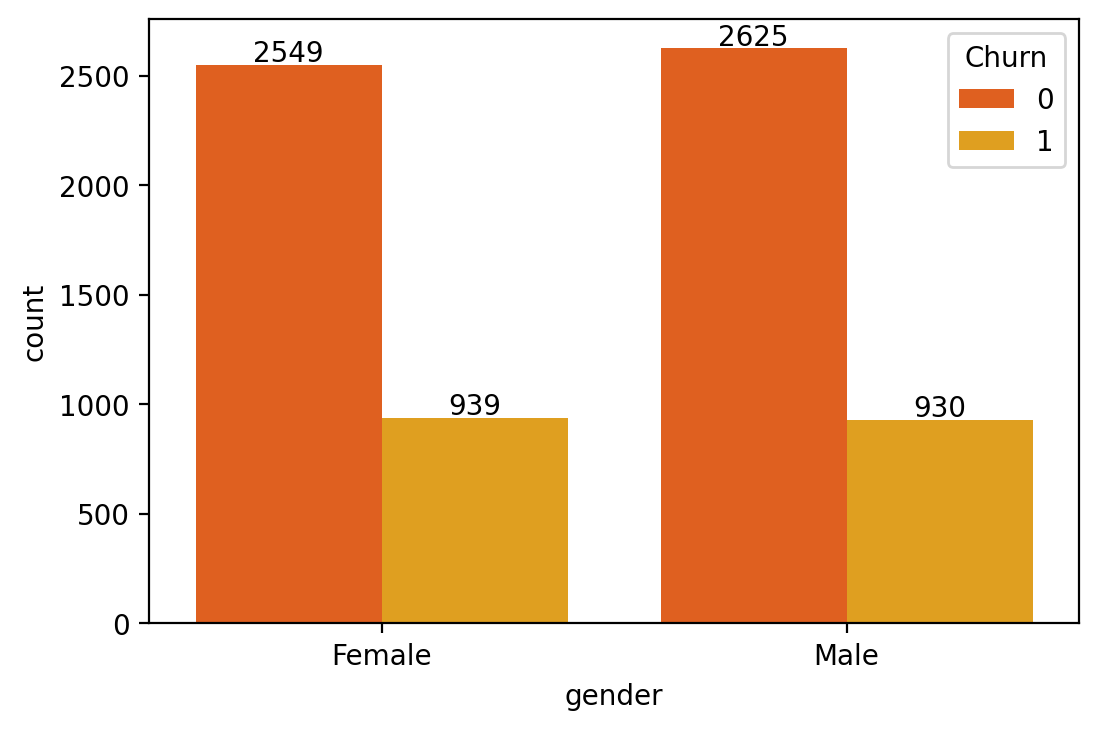

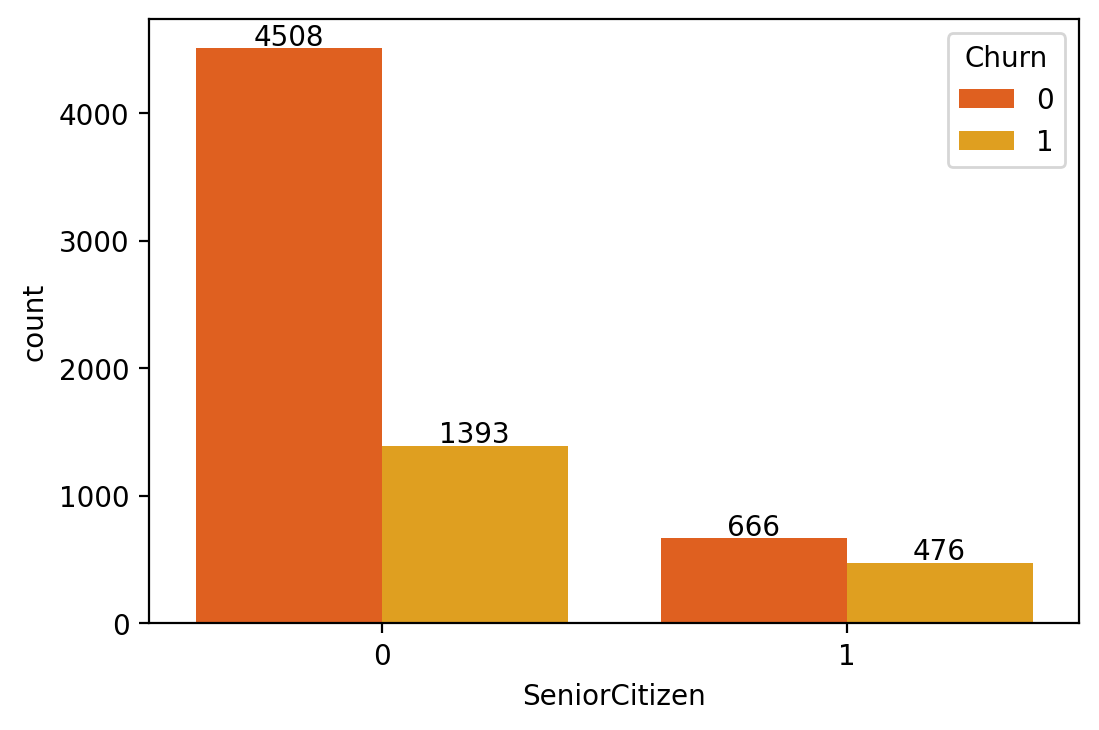

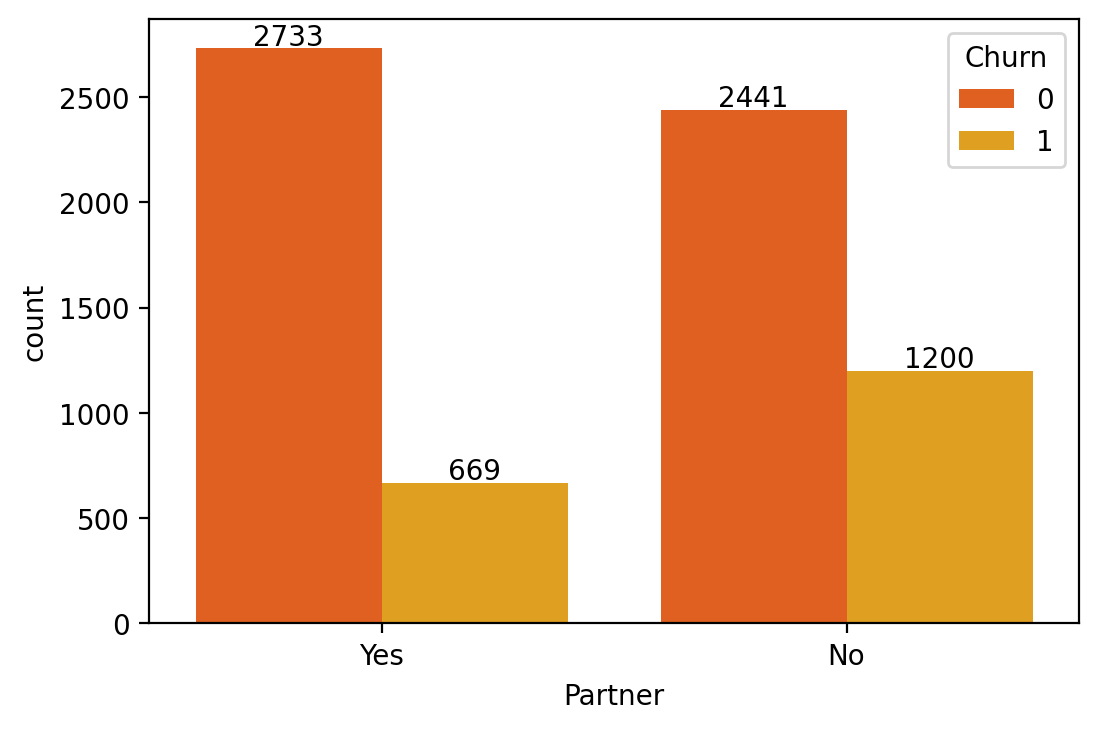

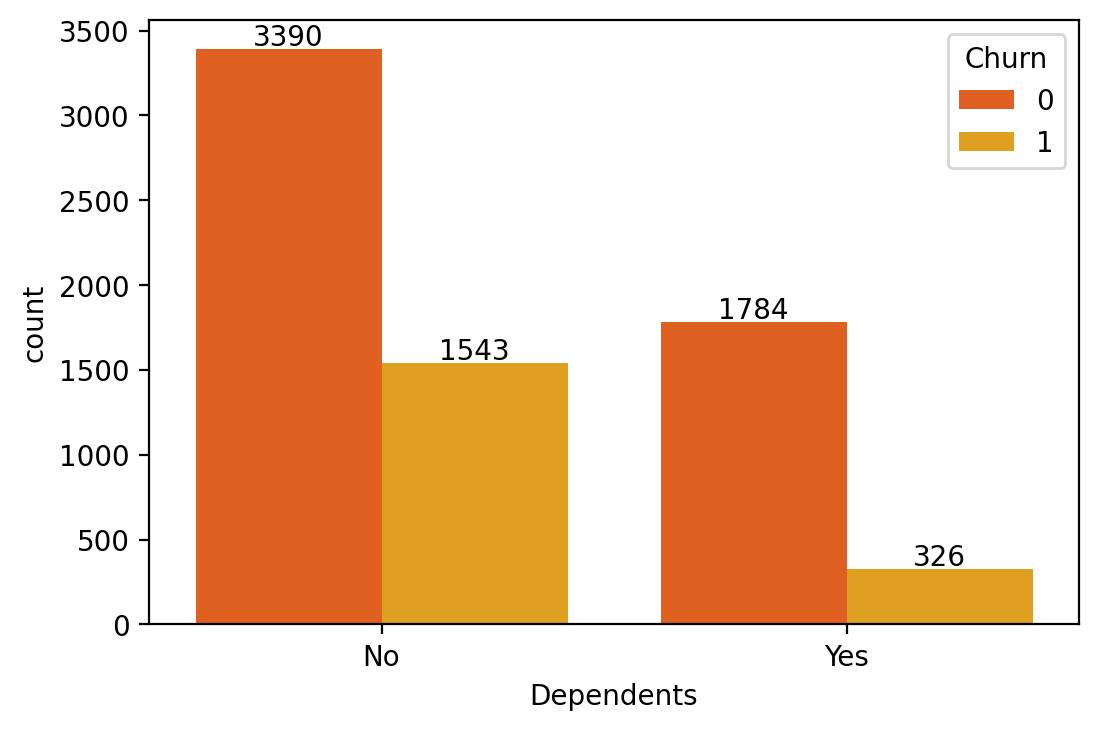

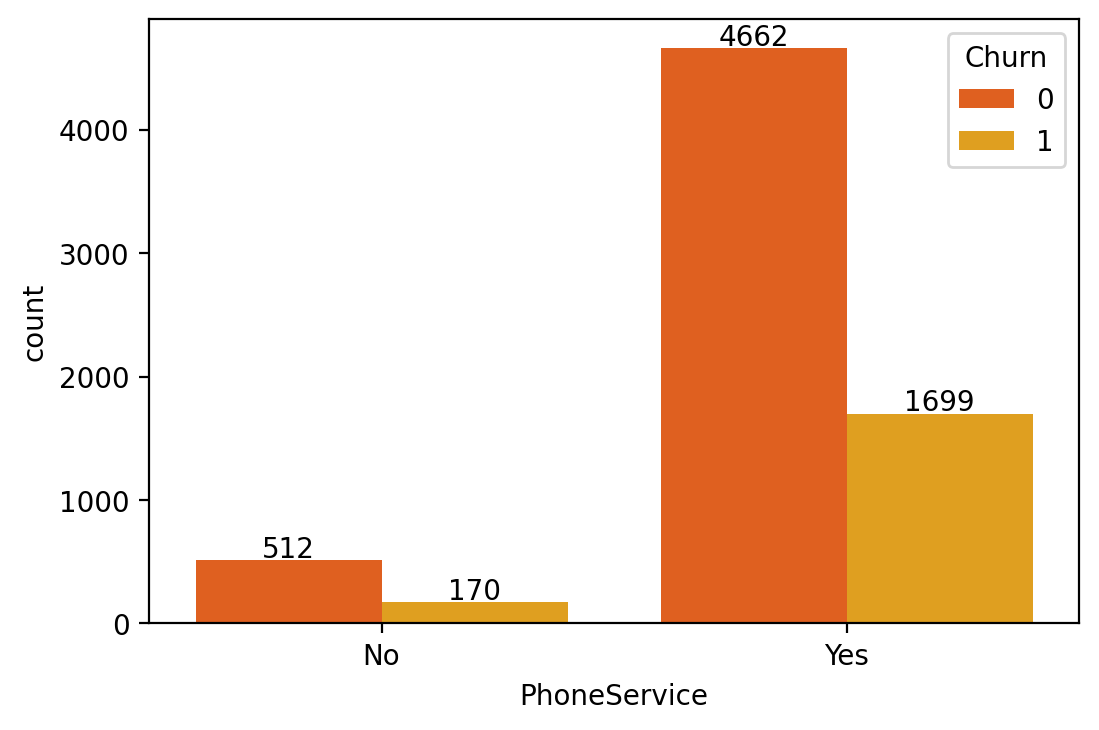

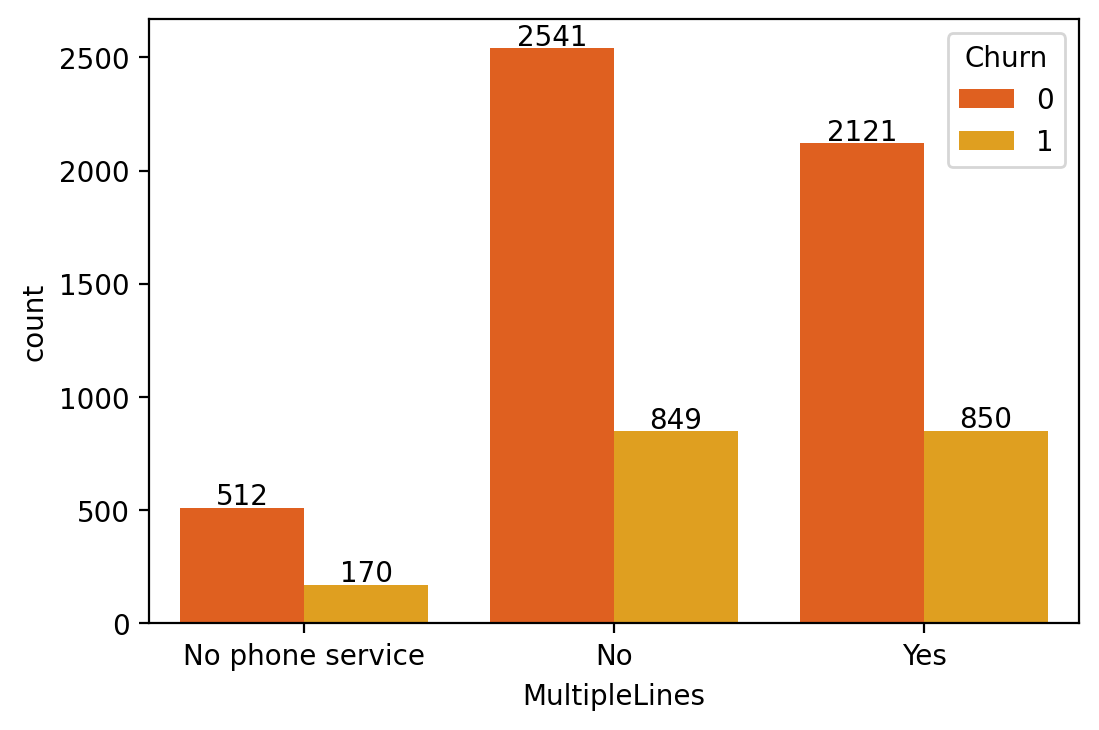

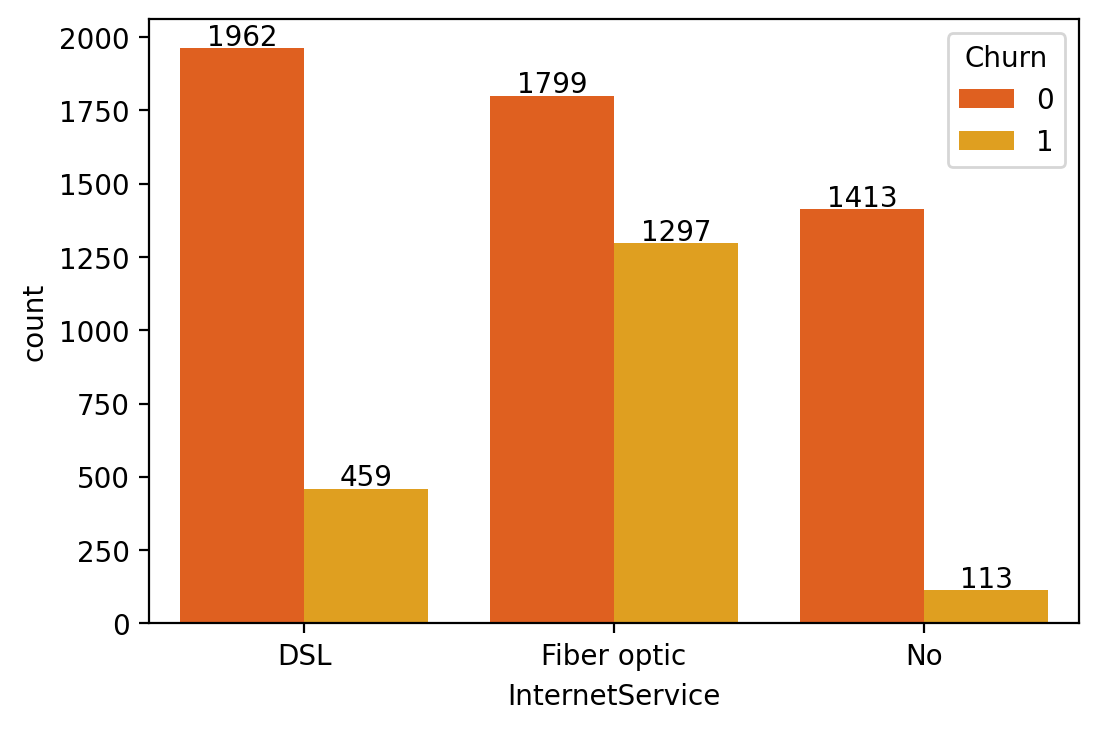

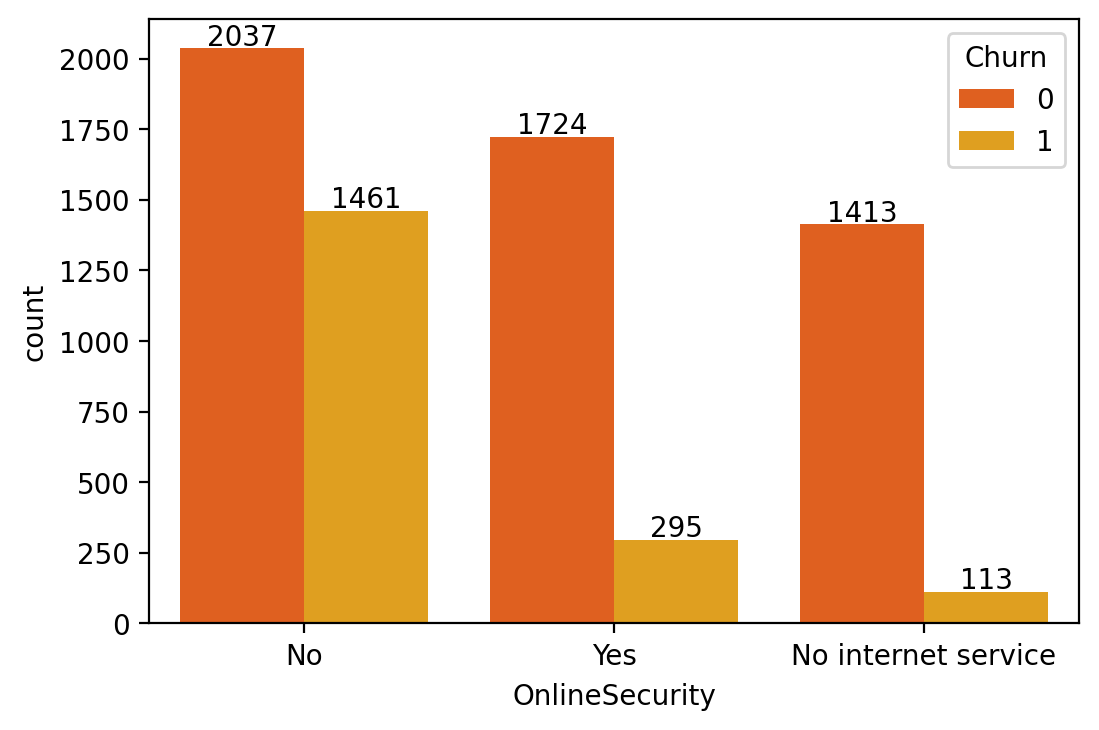

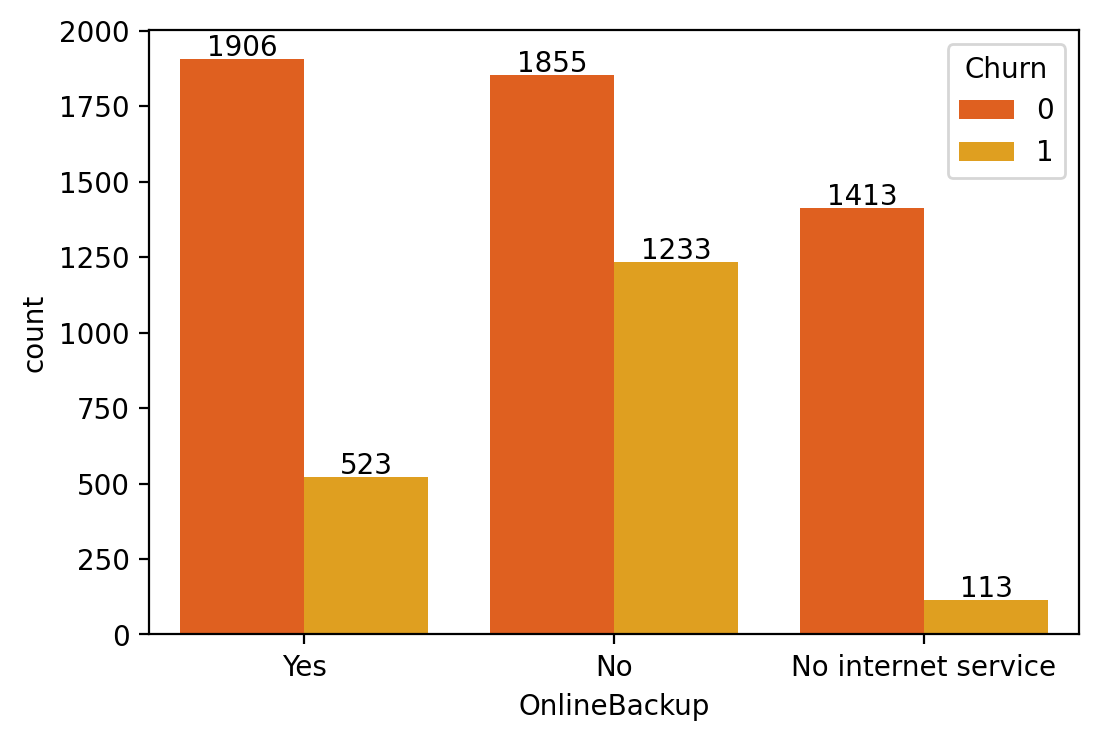

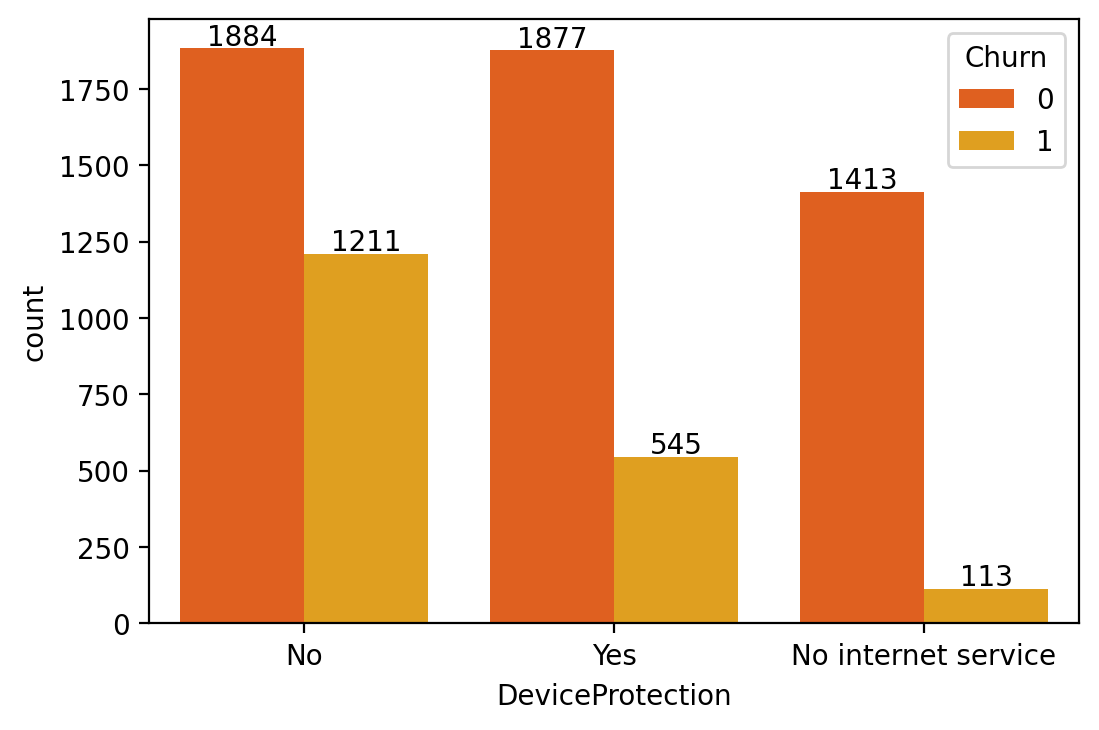

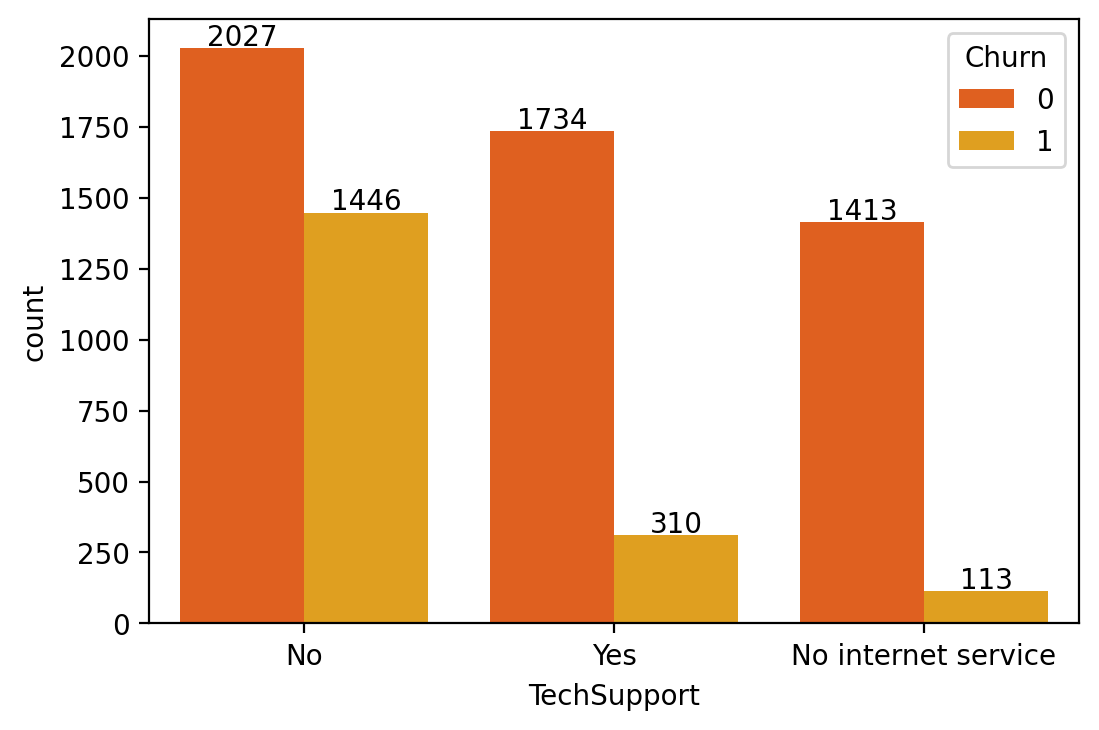

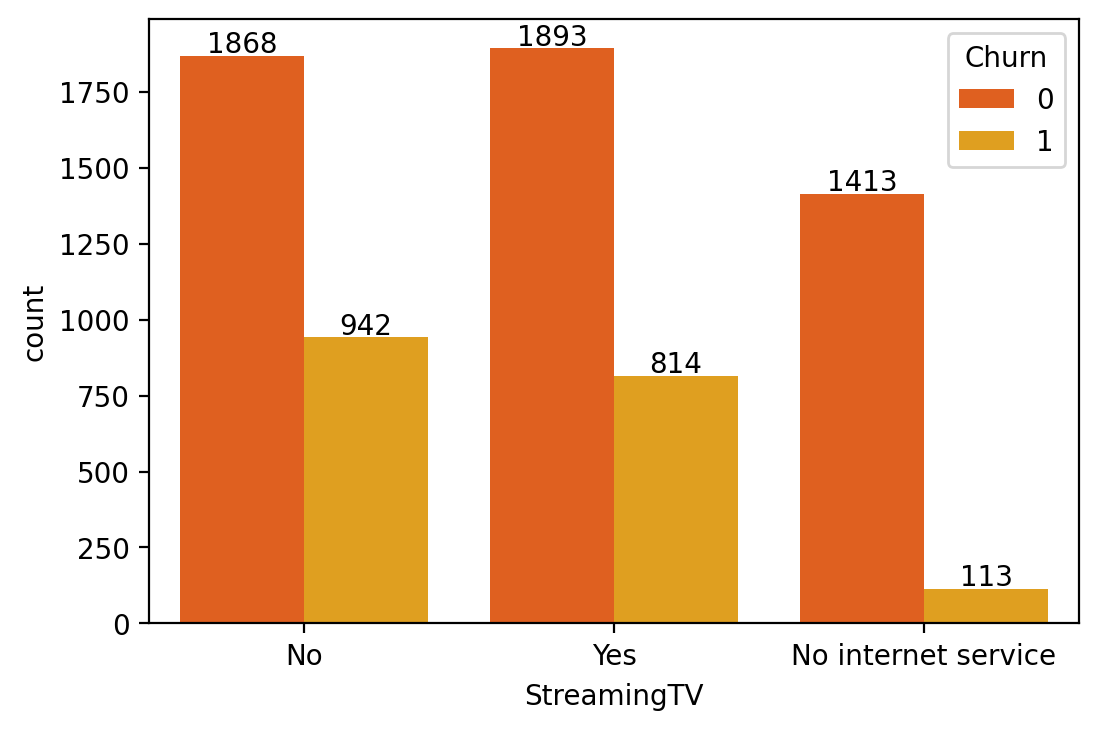

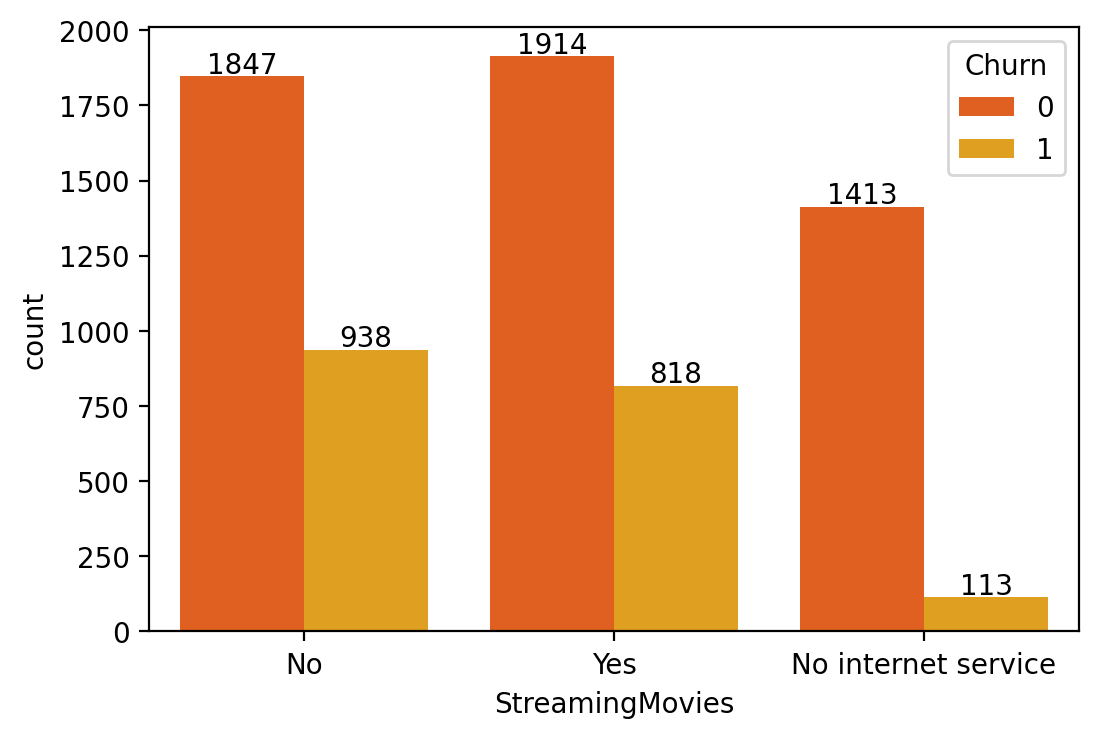

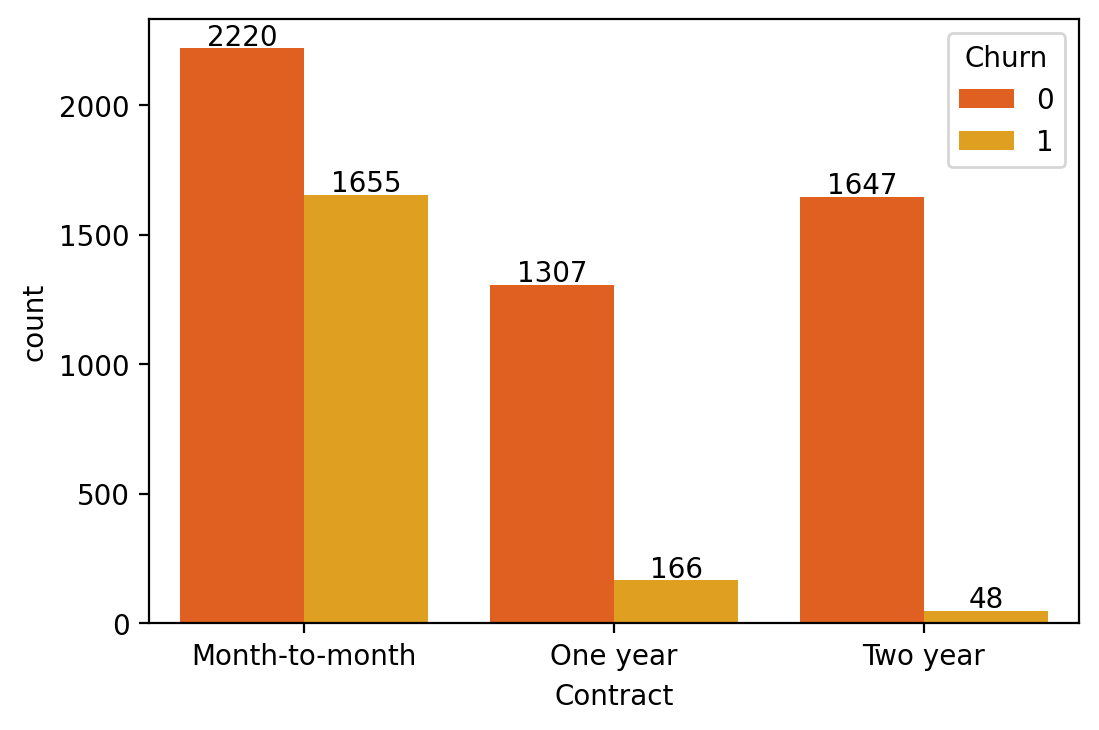

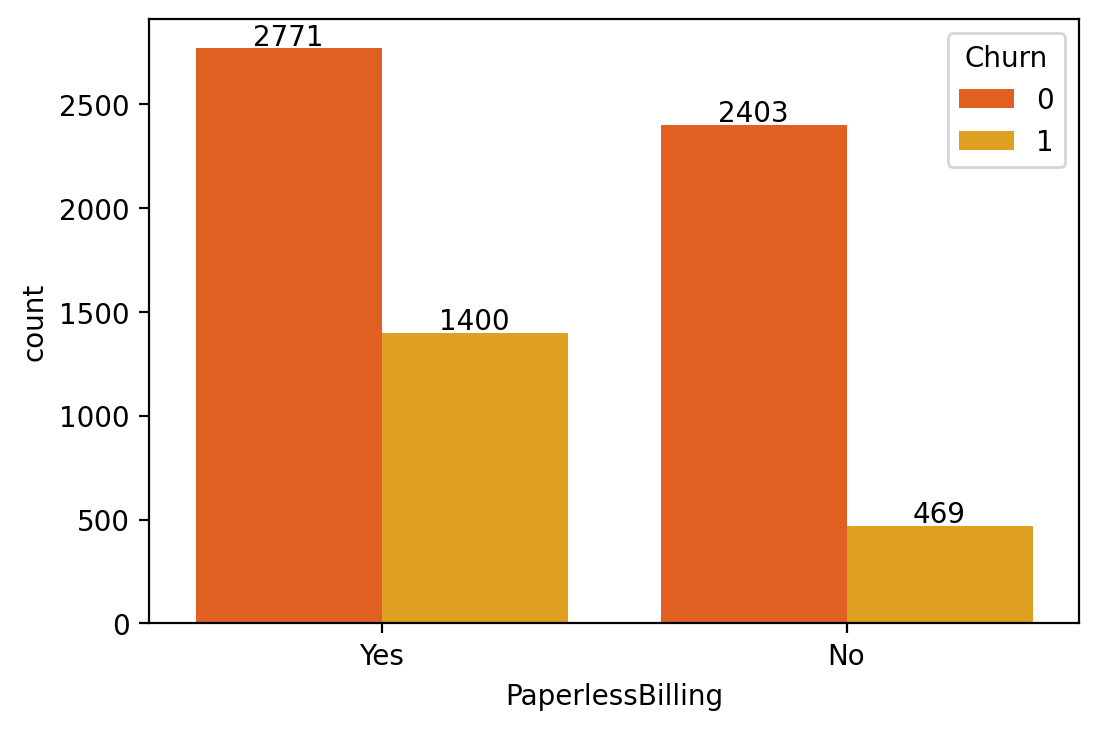

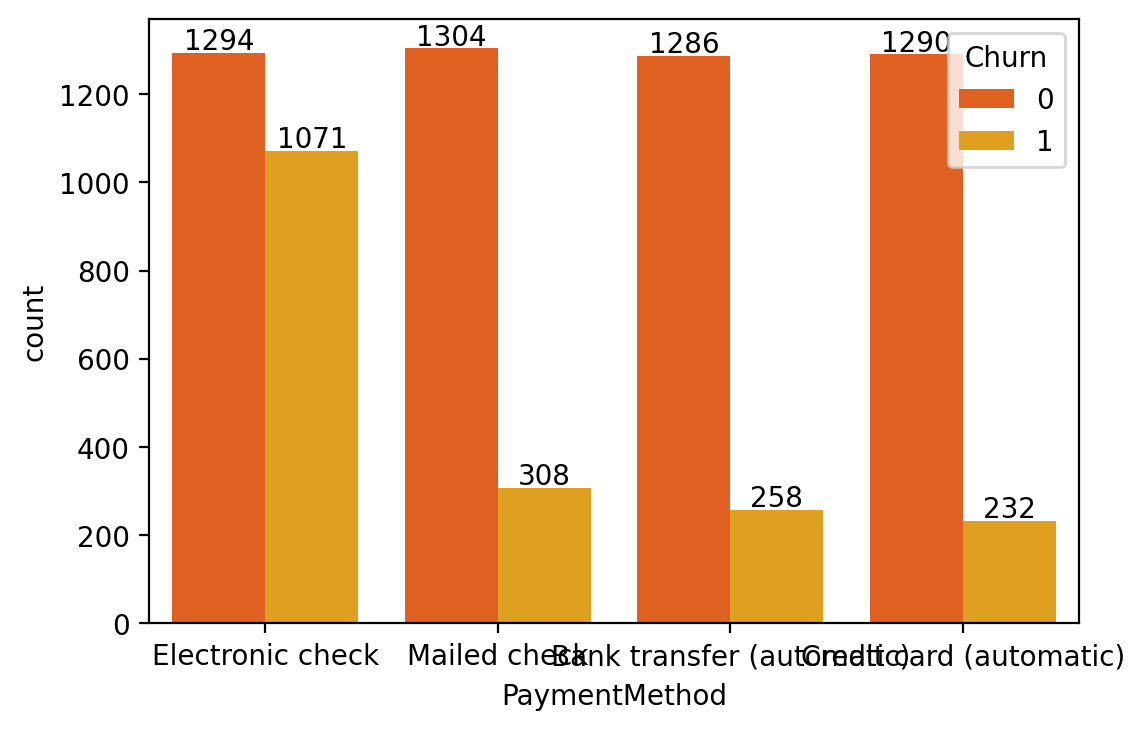

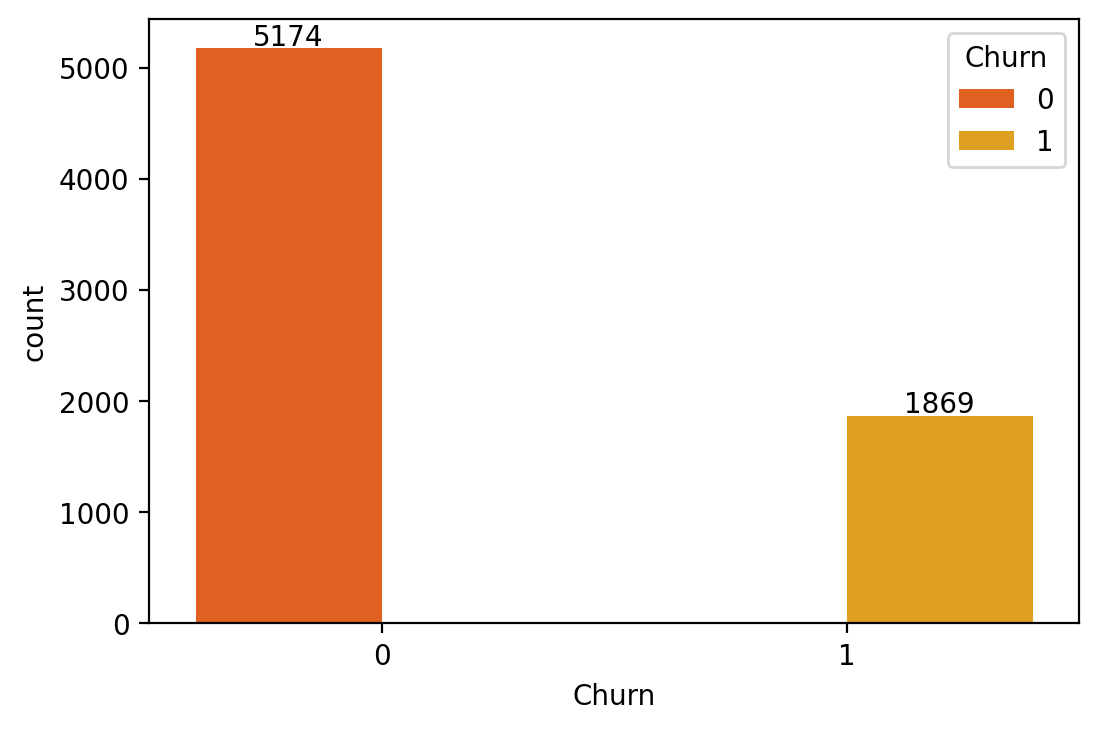

In [13]:
#Univaraite Analysis.

#i HUE each columns with the Churn columns, becuz that is out major Analysis.

for i,col in enumerate(df.drop(columns=['customerID','tenure','MonthlyCharges','TotalCharges'],axis=1)):
    plt.figure(i,dpi=200)
    sub=sns.countplot(data=df,x=col,hue='Churn',palette='autumn')
    for container in sub.containers:
        sub.bar_label(container,label_type='edge',padding=-1)

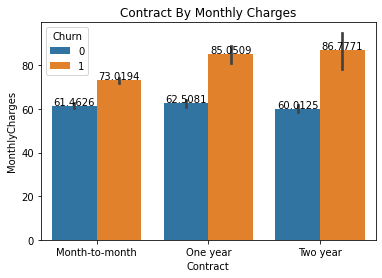

In [25]:
# we Move down to Multivariate Analysis

label=sns.barplot(data=df,x='Contract',y='MonthlyCharges',hue='Churn')
plt.title('Contract By Monthly Charges')
for container in label.containers:
    label.bar_label(container,label_type='edge',padding=-1)

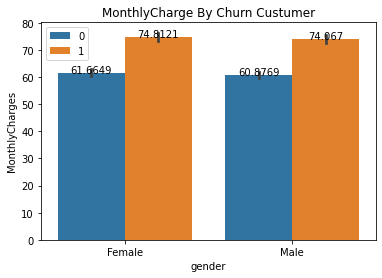

In [29]:
# we Move down to Multivariate Analysis

labels=sns.barplot(data=df,x='gender',y='MonthlyCharges',hue='Churn')
plt.title('MonthlyCharge By Churn Custumer')
plt.legend(loc='upper left')
for container in labels.containers:
    labels.bar_label(container,label_type='edge',padding=-2)

Text(0.5, 1.0, 'The MonthLy Charges By Custumers Churn')

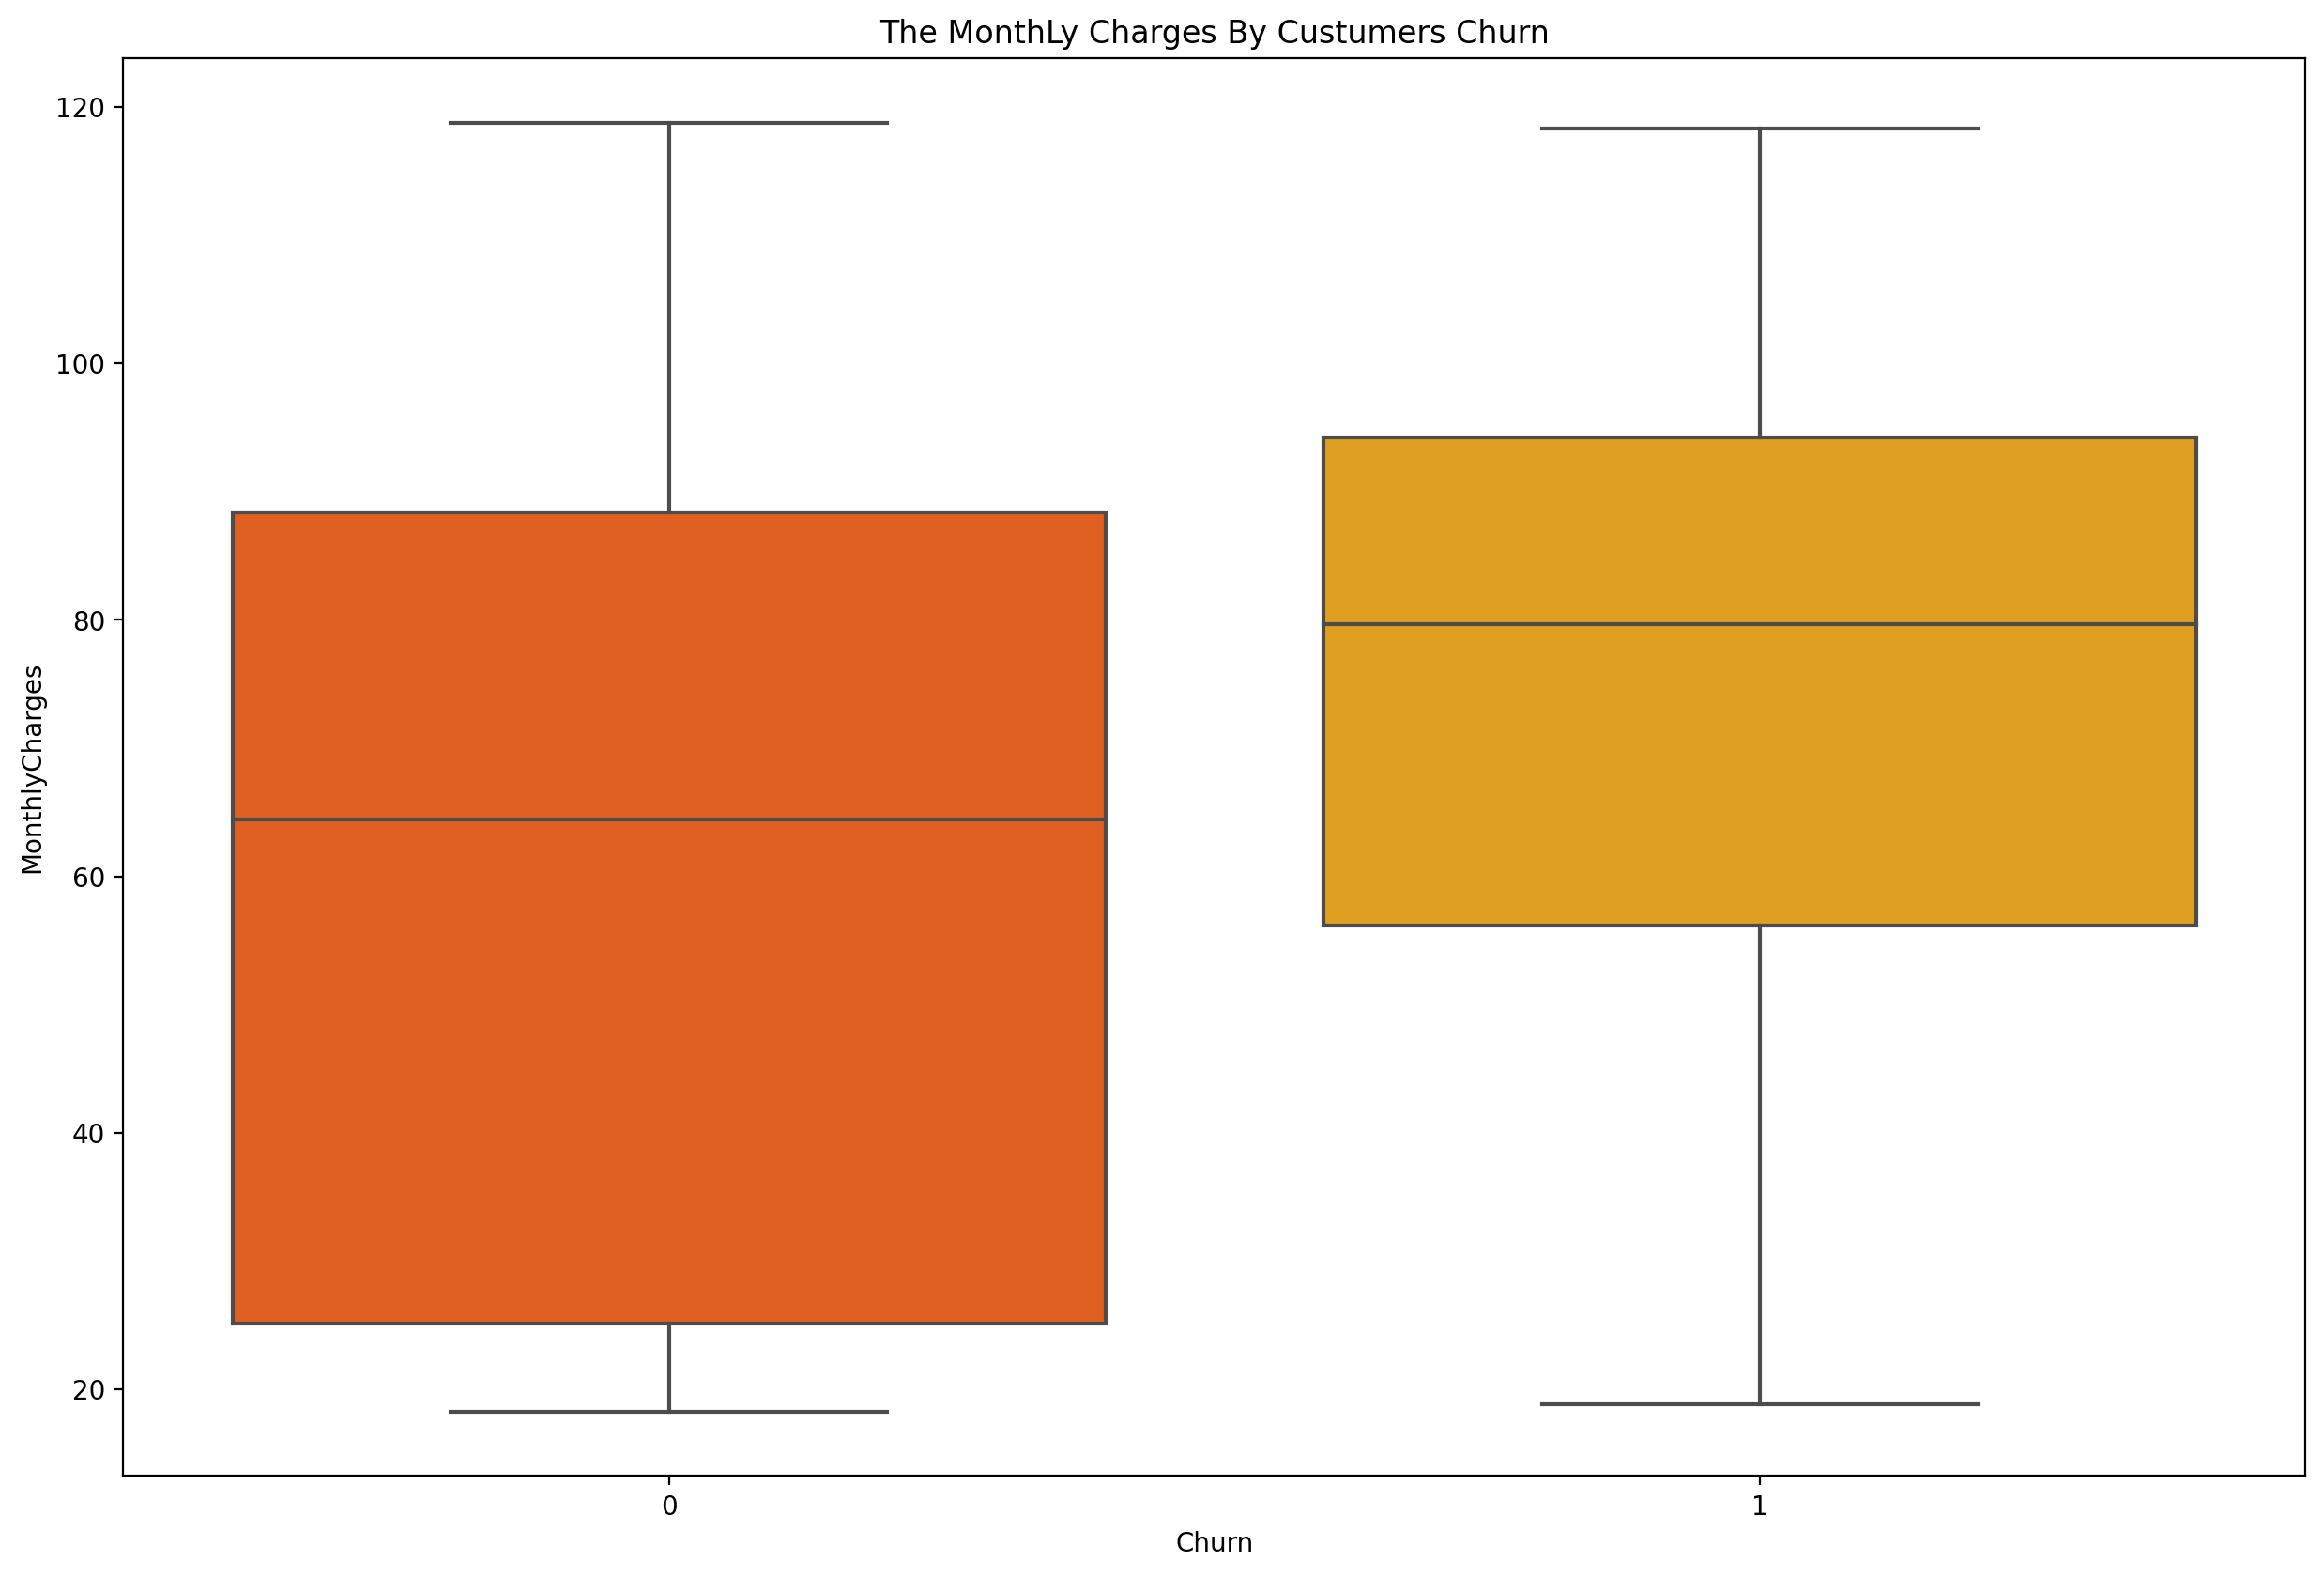

In [30]:
plt.figure(figsize=(15,10),dpi=200)
sns.boxplot(data=df,x='Churn',y='MonthlyCharges',palette='autumn')
plt.title('The MonthLy Charges By Custumers Churn')

In [45]:
💨 The Boxplot reveal to us that Most of our custumer Churn is because of excessives charges in Monthly bills.

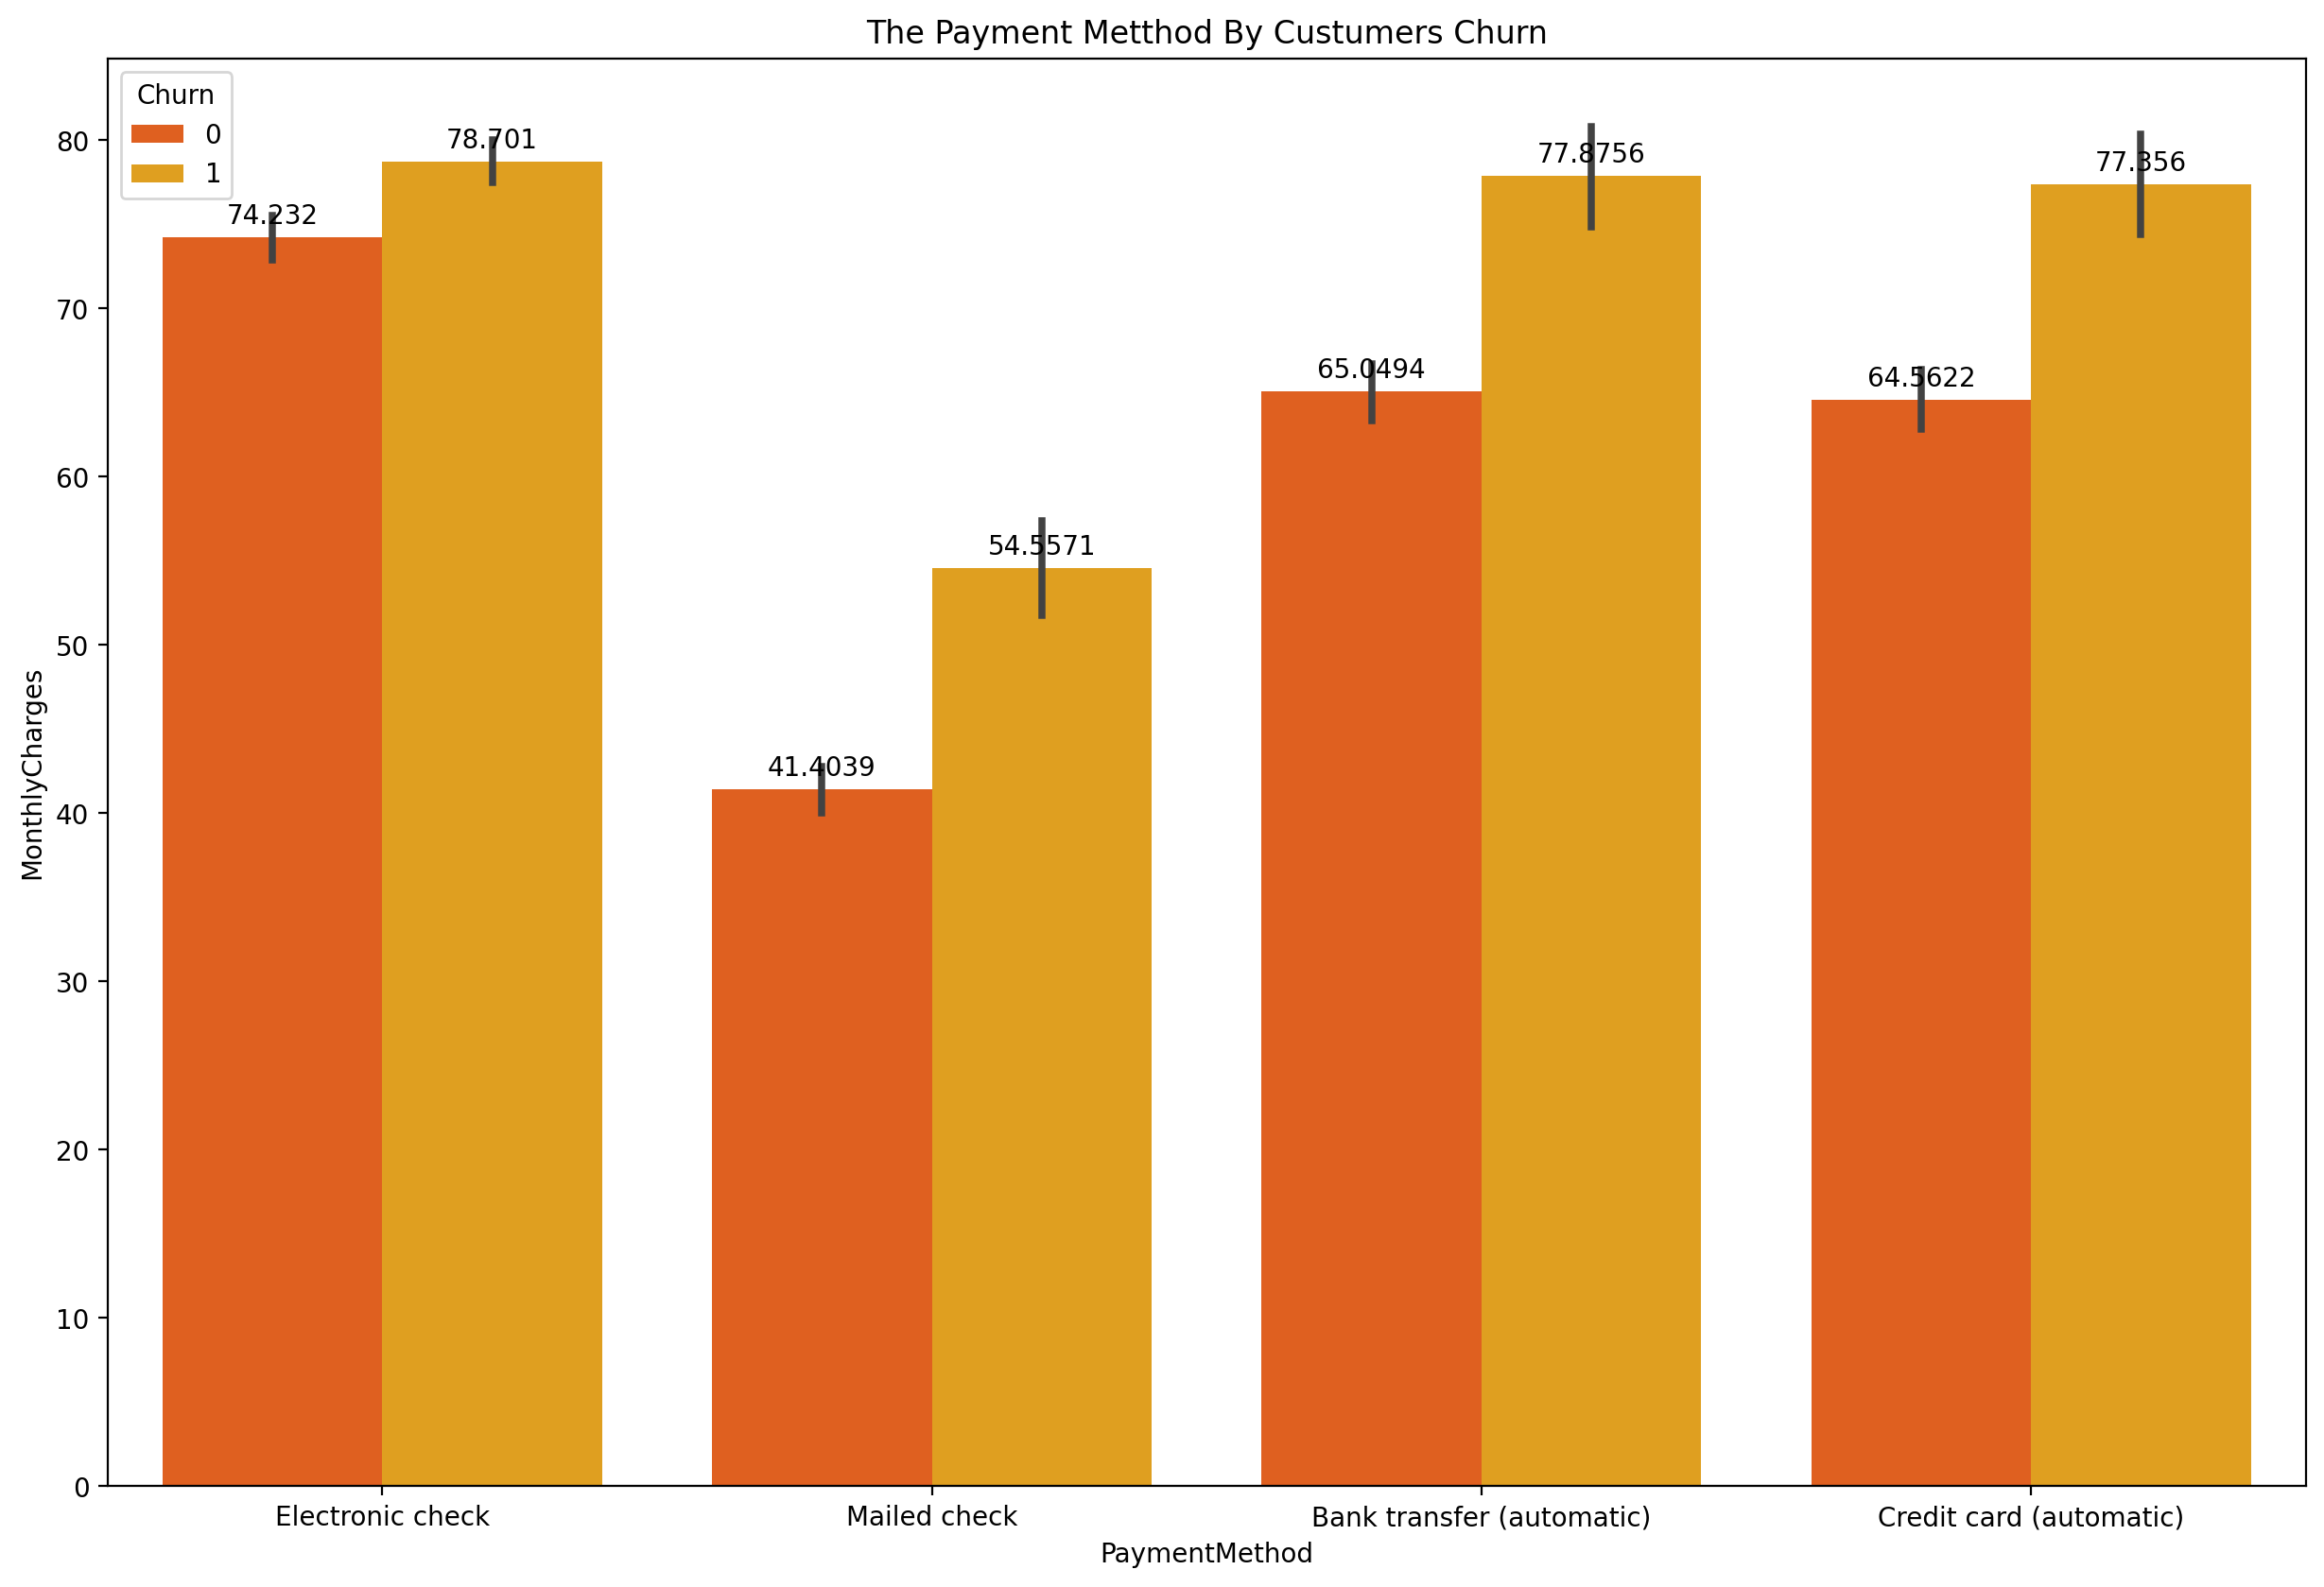

In [32]:
#From payment we can figure out our custumer Churn 

plt.figure(figsize=(15,10),dpi=200)
fig=sns.barplot(data=df,x='PaymentMethod',y='MonthlyCharges',hue='Churn',palette='autumn')
plt.title('The Payment Metthod By Custumers Churn')
for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=3)

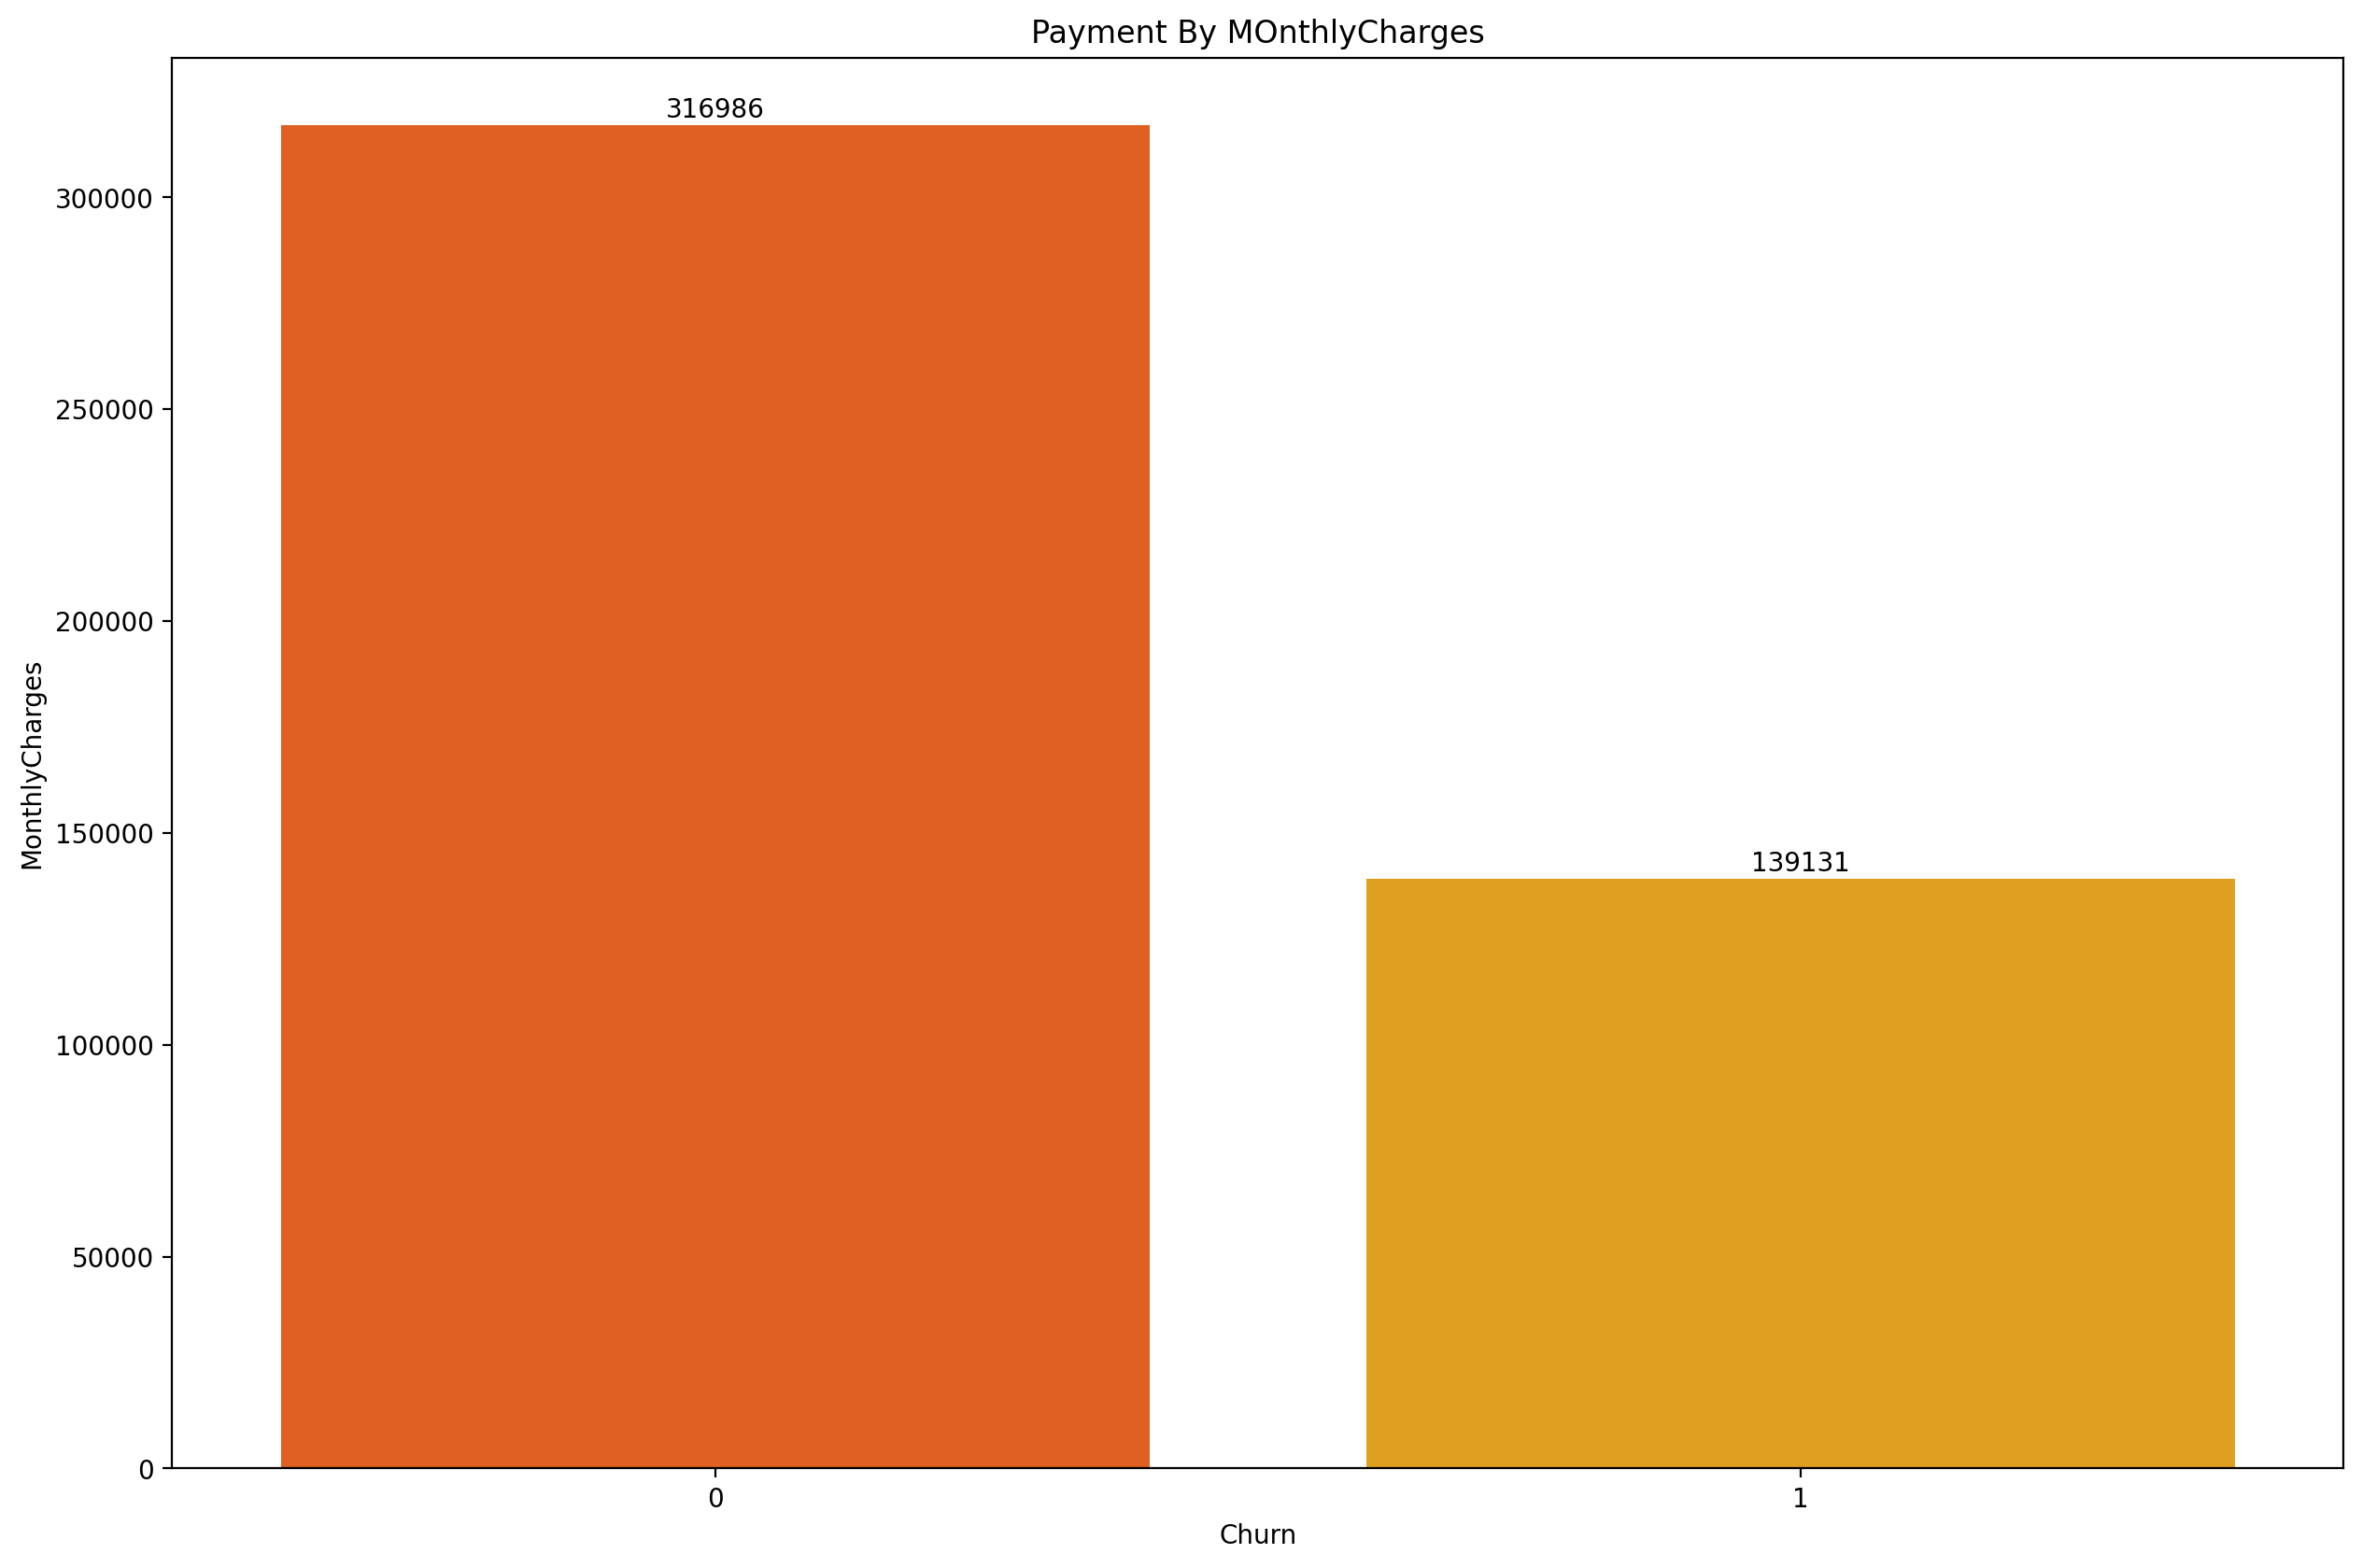

In [34]:
bypay=df.groupby('Churn')[['MonthlyCharges','PaymentMethod']].sum()

plt.figure(figsize=(15,10),dpi=200)
fi=sns.barplot(x=bypay.index,y=bypay['MonthlyCharges'],palette='autumn')
plt.title('Payment By MOnthlyCharges')
for container in fi.containers:
    fi.bar_label(container,label_type='edge',padding=1)

# Excessive charges in the Services Lead to the custumer Churn of the Company.